# Twitter airline sentiment analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/rod/Documents/Data_Science/courses/udemy/data_science_masterClass/DATA/airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Exploratory data analysis

### Count of sentiment labels

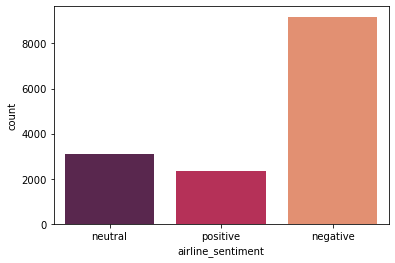

In [45]:
sns.countplot(data=df,
             x='airline_sentiment',palette='rocket');

### Reason for negative sentiment

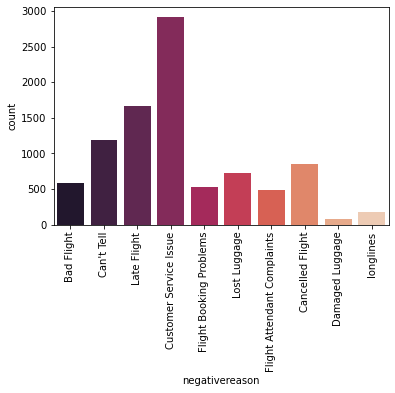

In [44]:
sns.countplot(data=df,
             x='negativereason', palette='rocket')
plt.xticks(rotation=90);

### Sentiment by airline

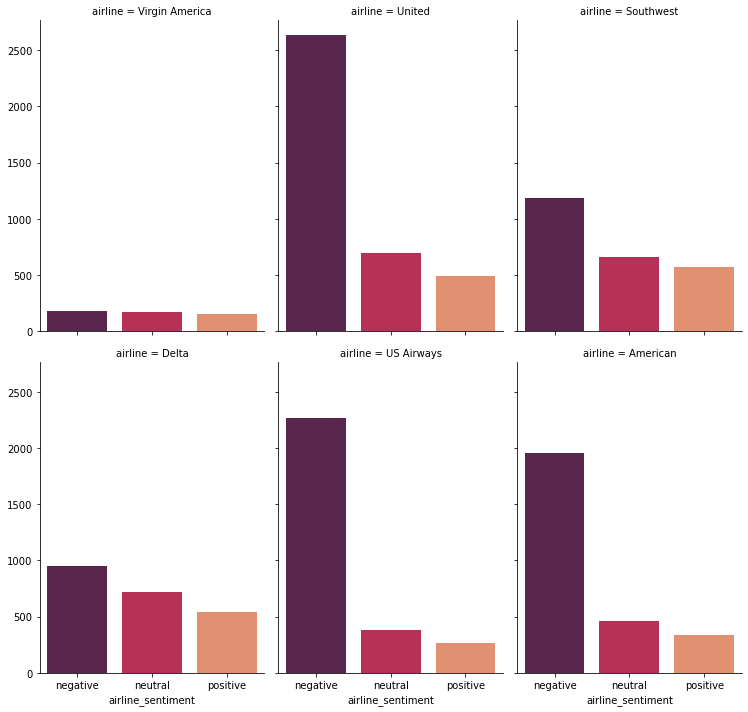

In [43]:
g = sns.FacetGrid(data=df, col='airline', col_wrap=3, height=5, aspect =0.7) 
g = g.map(sns.countplot, 'airline_sentiment', order=df['airline_sentiment'].value_counts().index,palette='rocket') 
plt.show()

## Machine Learning

In [46]:
data = df[['airline_sentiment','text']]

In [47]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


### Splitting - avoid data leakage

In [48]:
X = data['text']

In [49]:
y = data['airline_sentiment']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Vectorization

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf = TfidfVectorizer(stop_words='english')

In [54]:
# scaling the data
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [55]:
X_train_tfidf = tfidf.transform(X_train)

In [56]:
X_test_tfidf = tfidf.transform(X_test)

### Building Models

In [57]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [58]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [59]:
from sklearn.svm import SVC, LinearSVC

In [60]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [61]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

### Evaluating models

In [62]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [63]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test_tfidf, y_test)

#### multinomial naive bayes

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



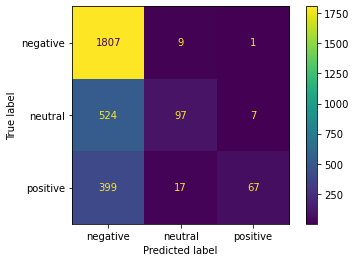

In [64]:
report(nb)

#### logistic regression

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



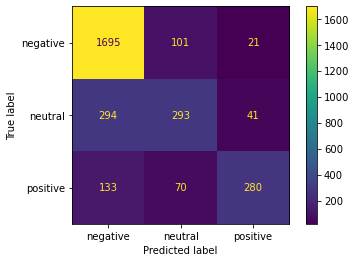

In [66]:
report(log_model)

#### support vector classifier - radial basis function

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



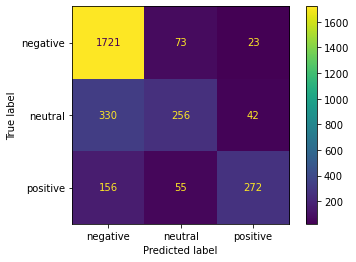

In [67]:
report(rbf_svc)

#### support vector classifier - linear kernel

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



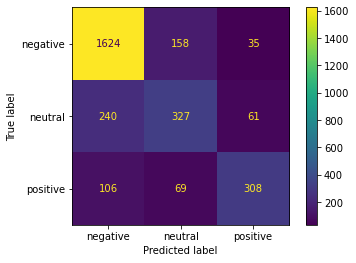

In [68]:
report(linear_svc)

## Pipeline for model deployment

For demonstration purposes, and before any attempt to improve the models above, I decided to select the linear_svc model to be deployed and used to classify raw tweets.

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                ('svc',LinearSVC())])

In [71]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [72]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)

In [76]:
pipe.predict(['food was not as expected'])

array(['negative'], dtype=object)

In [84]:
pipe.predict(['amazing experience'])

array(['positive'], dtype=object)